In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-price-prediction/pizza_v2.csv
/kaggle/input/pizza-price-prediction/pizza_v1.csv


In [2]:
df = pd.read_csv('/kaggle/input/pizza-price-prediction/pizza_v1.csv')

In [3]:
df.shape

(129, 8)

In [4]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


In [48]:
df.isnull().sum()

price           0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

the column price_rupiah contanins some character that we need to fix

In [6]:
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '') 
df['price_rupiah'] = df['price_rupiah'].str.replace(',', '')  
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'], errors='coerce')  

df.rename(columns={'price_rupiah': 'price'}, inplace=True)

In [7]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


In [8]:
# company col is irrelevant for our analysis
df.drop('company', axis = 1 , inplace = True)

Understanding Cardinality

In [9]:
df_cat = df.select_dtypes(include = 'object')

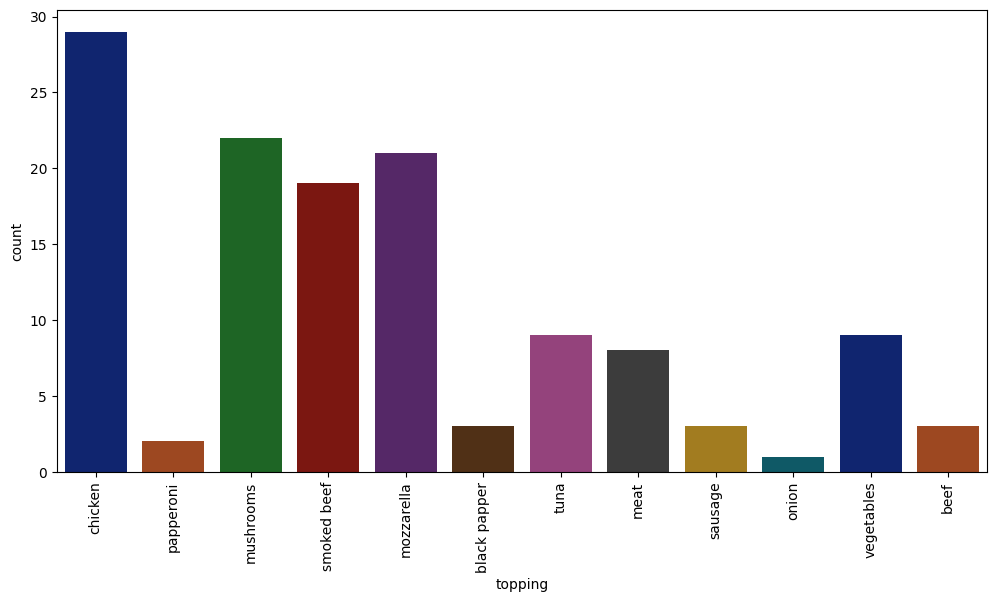

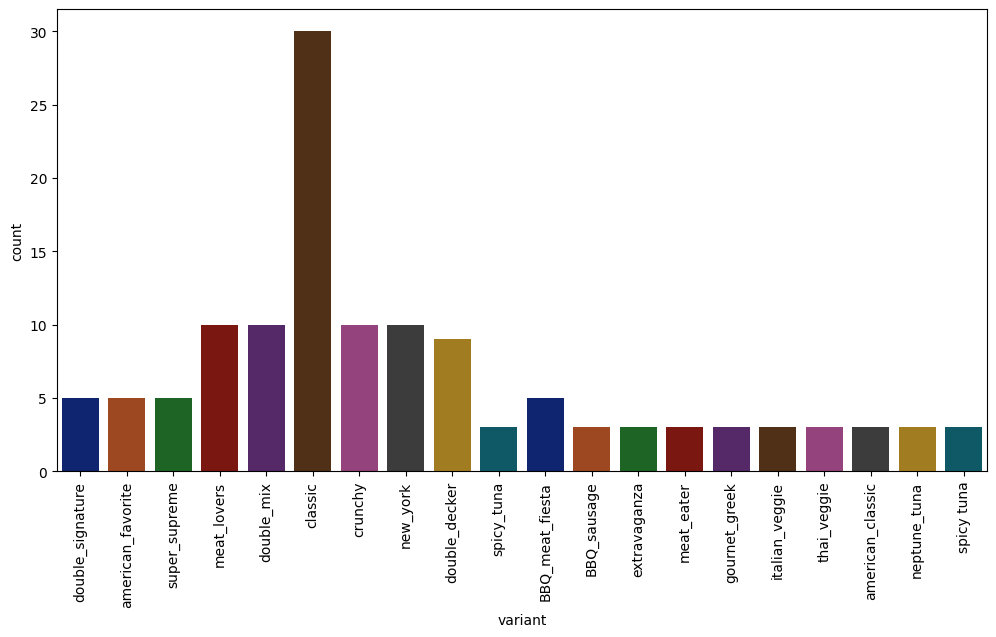

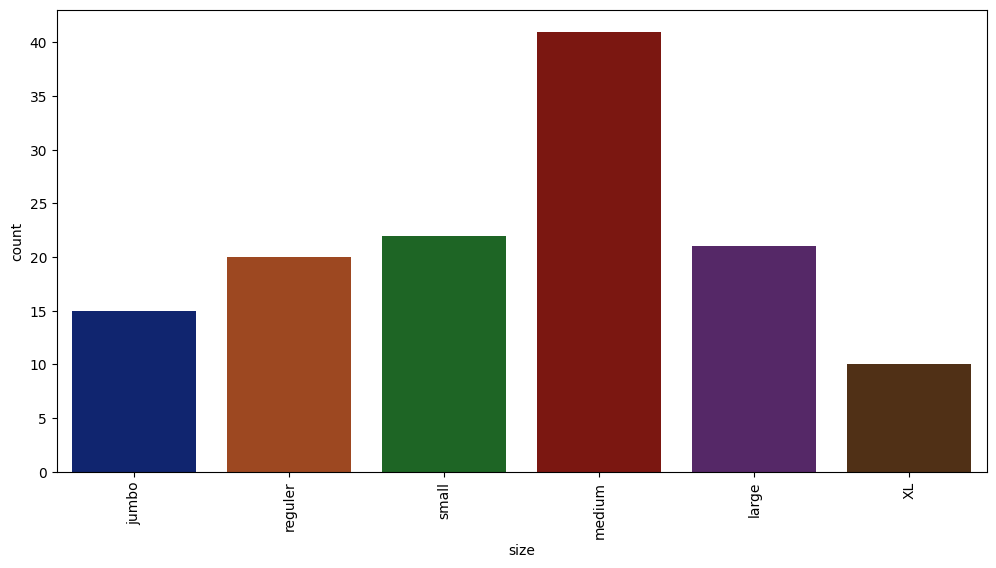

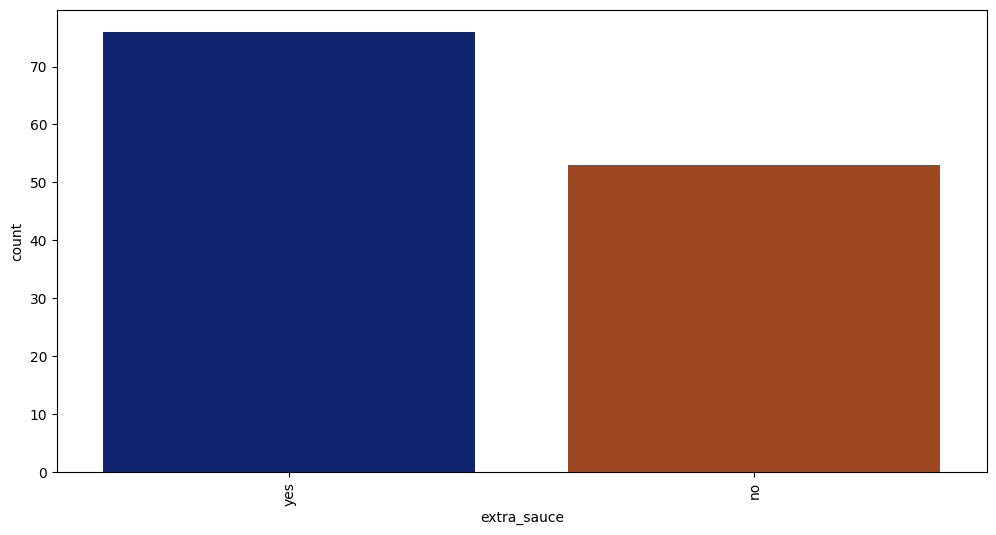

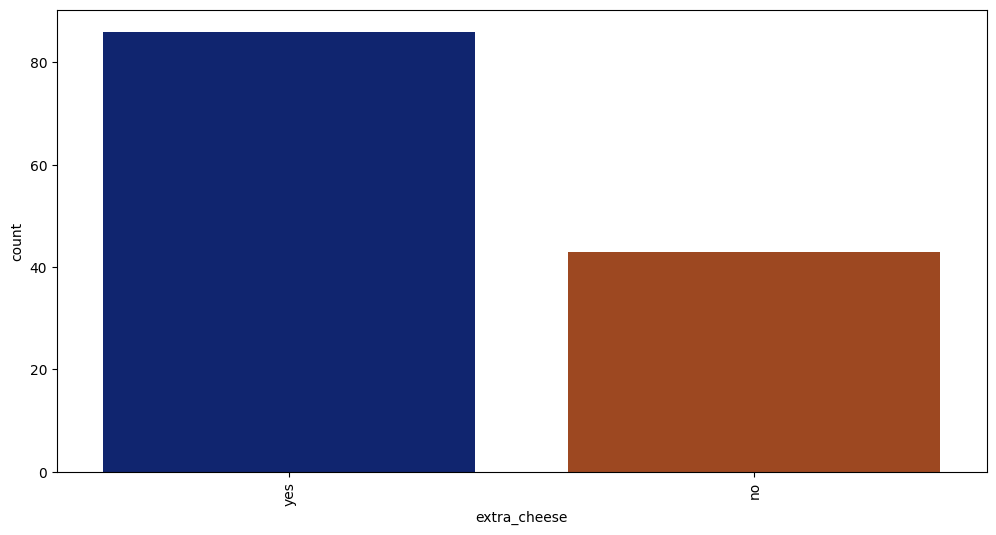

In [10]:
for col in df_cat.columns:
    plt.figure(figsize=(12,6))
    sns.countplot(x = col, data =df, palette = 'dark')
    plt.xticks(rotation = 90)
    plt.show()

variant and topping has high cardinality

In [11]:
df_cont = ['price','diameter']

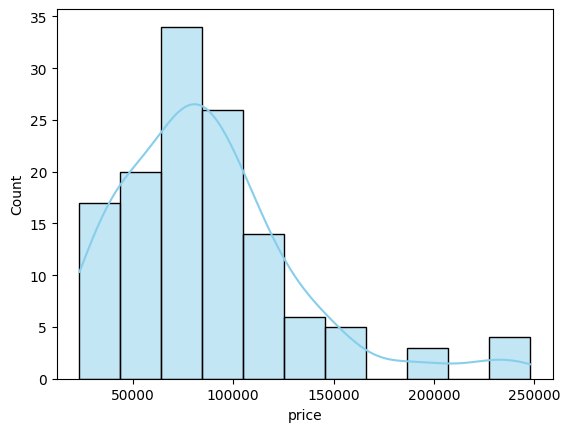

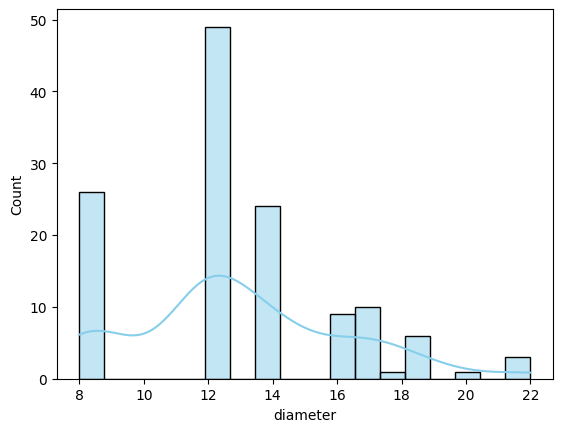

In [12]:
for col in df_cont:
    sns.histplot(x = col, kde = True, data = df, color = 'skyblue')
    plt.show()

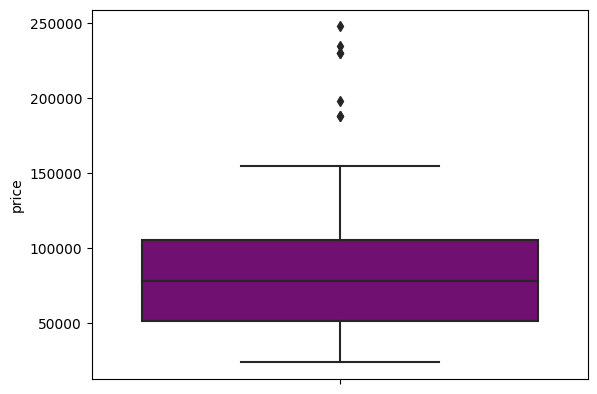

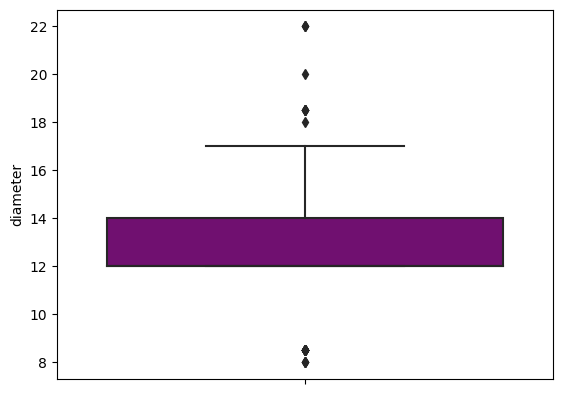

In [51]:
for col in df_cont:
    sns.boxplot(y = col, data = df, color  = 'purple')
    plt.show()

- the price peak is around 90k and diameter 12 is mostly occuring
- There is very few outliers as well

Train test split the data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop('price', axis = 1 )
y = df['price']

In [15]:
x.head()

,diameter,topping,variant,size,extra_sauce,extra_cheese
0,22.0,chicken,double_signature,jumbo,yes,yes
1,20.0,papperoni,double_signature,jumbo,yes,yes
2,16.0,mushrooms,double_signature,reguler,yes,yes
3,14.0,smoked beef,double_signature,reguler,yes,no
4,18.0,mozzarella,double_signature,jumbo,yes,no


creating dummy variables for categorical columns

In [16]:
x_dummies = pd.get_dummies(x, drop_first=True,dtype=int)

In [17]:
x_dummies.head()

,diameter,topping_black papper,topping_chicken,topping_meat,topping_mozzarella,topping_mushrooms,topping_onion,topping_papperoni,topping_sausage,topping_smoked beef,...,variant_spicy_tuna,variant_super_supreme,variant_thai_veggie,size_jumbo,size_large,size_medium,size_reguler,size_small,extra_sauce_yes,extra_cheese_yes
0,22.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,20.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
2,16.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,14.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,18.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
x_train,x_test,y_train,y_test =train_test_split(x_dummies,y,test_size=0.2, random_state=42) 

In [24]:
print(x_train.shape)

(103, 38)


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rfr = RandomForestRegressor()

In [31]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
y_pred = rfr.predict(x_test)

In [45]:
# oriignal value
y_test[:3]

55    39000
40    76000
19    90000
Name: price, dtype: int64

In [47]:
# predicted values
y_pred[:3]

array([34860., 70580., 86540.])

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
print('R2 Score : ',r2_score(y_test,y_pred))

R2 Score :  0.9009438570239467


In [41]:
mean_absolute_error(y_test,y_pred)

7578.076923076923

In [43]:
mse = mean_squared_error(y_test,y_pred)
mse

278454767.3076923

In [44]:
# root mean squared error
rmse = mse**0.5
rmse

16686.963993120266

In [57]:
# feature Importance
importances = rfr.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_dummies.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                      Feature    Importance
0                    diameter  6.072101e-01
35                 size_small  7.452157e-02
17      variant_double_decker  7.279816e-02
34               size_reguler  4.043735e-02
36            extra_sauce_yes  2.940590e-02
18         variant_double_mix  2.180722e-02
9         topping_smoked beef  2.070971e-02
15            variant_classic  1.891102e-02
33                size_medium  1.777508e-02
2             topping_chicken  1.719438e-02
31                 size_jumbo  1.626150e-02
26           variant_new_york  1.067412e-02
37           extra_cheese_yes  9.376062e-03
32                 size_large  8.513205e-03
19   variant_double_signature  7.643210e-03
4          topping_mozzarella  7.419367e-03
5           topping_mushrooms  6.196106e-03
16            variant_crunchy  3.123635e-03
22     variant_italian_veggie  1.496711e-03
3                topping_meat  1.428318e-03
24        variant_meat_lovers  1.194956e-03
7           topping_papperoni  8